In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from itertools import product

In [2]:
df = pd.read_csv('./data/bitcoin-price-17_9_14-8_12_22.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3000,2022-12-04,16908.169922,17157.767578,16903.439453,17130.486328,17130.486328,16824520830
3001,2022-12-05,17128.894531,17378.152344,16922.431641,16974.826172,16974.826172,22209086834
3002,2022-12-06,16975.238281,17091.863281,16939.921875,17089.503906,17089.503906,19889922369
3003,2022-12-07,17089.505859,17109.376953,16750.558594,16848.126953,16848.126953,19675404389


In [4]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df['Adj Close'])[1])

Dickey–Fuller test: p=0.467940


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


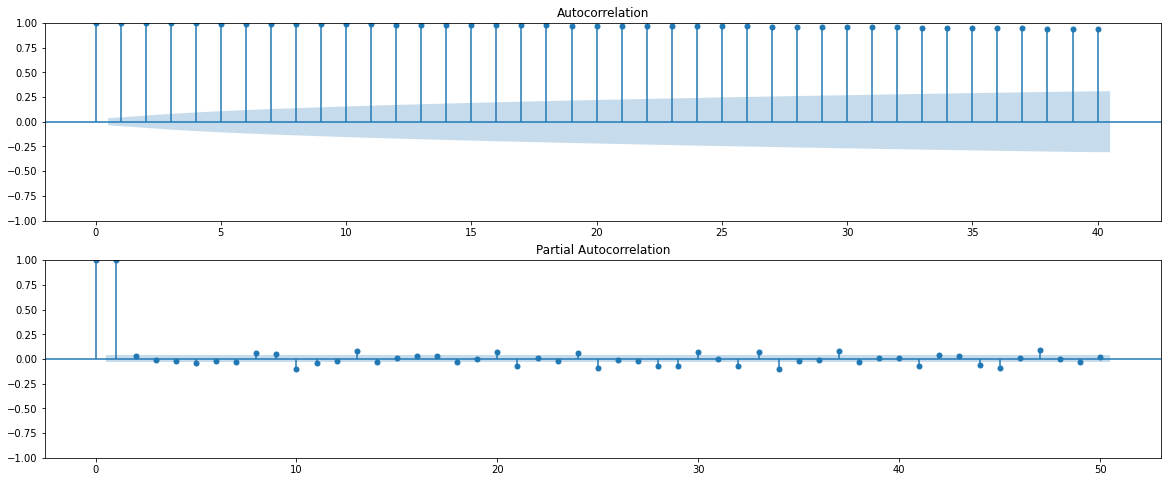

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))
pyplot.subplot(211)
plot_acf(df['Adj Close'], ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(df['Adj Close'], ax=pyplot.gca(), lags=50)
pyplot.show()

In [6]:
df.index

RangeIndex(start=0, stop=3005, step=1)

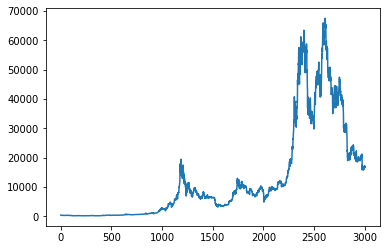

In [7]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [8]:
df.index[-1]

3004

In [9]:
future = pd.Series(pd.period_range(df.index[-1], freq="D", periods=11))
ts = pd.Series(np.zeros(len(future)), future)

In [10]:
ts

3004-01-01    0.0
3004-01-02    0.0
3004-01-03    0.0
3004-01-04    0.0
3004-01-05    0.0
3004-01-06    0.0
3004-01-07    0.0
3004-01-08    0.0
3004-01-09    0.0
3004-01-10    0.0
3004-01-11    0.0
Freq: D, dtype: float64

In [11]:
#Train test split

to_row= int(len(df)*0.9)
training_data = list(df[0:to_row]['Adj Close'])
testing = df[to_row:]['Adj Close']
#testing = testing.append(ts)
#testing_data = list(testing)
testing_data = list(df[to_row:]['Adj Close'])

In [12]:
model_predictions = []
n_test_obser = len(testing_data)

In [13]:
training_data

[457.3340148925781,
 424.4400024414063,
 394.7959899902344,
 408.9039916992188,
 398.8210144042969,
 402.1520080566406,
 435.7909851074219,
 423.2049865722656,
 411.5740051269531,
 404.4249877929688,
 399.5199890136719,
 377.1809997558594,
 375.4670104980469,
 386.9440002441406,
 383.614990234375,
 375.0719909667969,
 359.5119934082031,
 328.8659973144531,
 320.510009765625,
 330.0790100097656,
 336.18701171875,
 352.94000244140625,
 365.0260009765625,
 361.56201171875,
 362.2990112304688,
 378.5490112304688,
 390.41400146484375,
 400.8699951171875,
 394.7730102539063,
 382.5559997558594,
 383.7579956054688,
 391.4419860839844,
 389.5459899902344,
 382.8450012207031,
 386.4750061035156,
 383.1579895019531,
 358.4169921875,
 358.3450012207031,
 347.27099609375,
 354.7040100097656,
 352.989013671875,
 357.6180114746094,
 335.59100341796875,
 345.30499267578125,
 338.3210144042969,
 325.7489929199219,
 325.8919982910156,
 327.5539855957031,
 330.49200439453125,
 339.4859924316406,
 349.29

In [14]:
testing_data

[42407.9375,
 42244.46875,
 42197.515625,
 42586.91796875,
 44575.203125,
 43961.859375,
 40538.01171875,
 40030.9765625,
 40122.15625,
 38431.37890625,
 37075.28125,
 38286.02734375,
 37296.5703125,
 38332.609375,
 39214.21875,
 39105.1484375,
 37709.78515625,
 43193.234375,
 44354.63671875,
 43924.1171875,
 42451.7890625,
 39137.60546875,
 39400.5859375,
 38419.984375,
 38062.0390625,
 38737.26953125,
 41982.92578125,
 39437.4609375,
 38794.97265625,
 38904.01171875,
 37849.6640625,
 39666.75390625,
 39338.78515625,
 41143.9296875,
 40951.37890625,
 41801.15625,
 42190.65234375,
 41247.82421875,
 41077.99609375,
 42358.80859375,
 42892.95703125,
 43960.93359375,
 44348.73046875,
 44500.828125,
 46820.4921875,
 47128.00390625,
 47465.73046875,
 47062.6640625,
 45538.67578125,
 46281.64453125,
 45868.94921875,
 46453.56640625,
 46622.67578125,
 45555.9921875,
 43206.73828125,
 43503.84765625,
 42287.6640625,
 42782.13671875,
 42207.671875,
 39521.90234375,
 40127.18359375,
 41166.73046

In [15]:
len(testing_data)

301

In [16]:
len(model_predictions)

0

In [18]:
# Initial approximation of parameters
Qs = range(0, 9)
qs = range(0, 9)
d=range(0, 2)
parameters = product(Qs,d, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
for param in parameters_list:
    try:
        model=ARIMA(training_data, order=(param[0], param[1], param[2]),enforce_stationarity=False,
                                            enforce_invertibility=False).fit()
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model 
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

In [ ]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

    parameters           aic
161  (8, 1, 8)  43371.128868
143  (7, 1, 8)  43393.068494
155  (8, 1, 2)  43396.915687
53   (2, 1, 8)  43397.809630
107  (5, 1, 8)  43398.135274
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2702
Model:                 ARIMA(8, 1, 8)   Log Likelihood              -21668.564
Date:                Tue, 06 Dec 2022   AIC                          43371.129
Time:                        19:43:44   BIC                          43471.396
Sample:                             0   HQIC                         43407.394
                               - 2702                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5271      0.087    

In [ ]:
best_model.model_orders['ar']

8

In [ ]:
best_model.param_terms

['ar', 'ma', 'variance']

In [ ]:
for i in range(n_test_obser):
   a = ARIMA(training_data, order = (best_model.model_orders['ar'],best_model.model_orders['ma'],best_model.model_orders['variance']),enforce_stationarity=False,
                                            enforce_invertibility=False)
   model_fit = a.fit()
   output = model_fit.forecast()
   yhat = output[0]
   model_predictions.append(yhat)
   actual_test_value = testing_data[i] 
   training_data.append(actual_test_value)

In [ ]:
model_predictions

[44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,
 44221.29547485893,


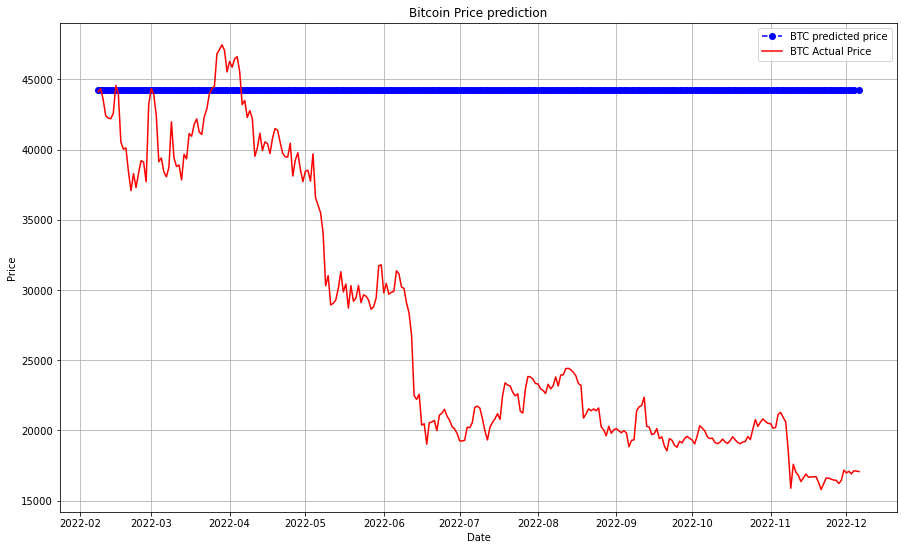

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = testing.index

plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='BTC predicted price')
plt.plot(date_range, testing_data, color ='red', label='BTC Actual Price')

plt.title('Bitcoin Price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()